In [ ]:
# Access to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris = pd.DataFrame(data=iris_data.data,

columns=iris_data.feature_names)

iris['Species'] = pd.Categorical.from_codes(iris_data.target,
iris_data.target_names)

In [ ]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Text(0.5, 1.0, 'Sepal Length vs Sepal Width')

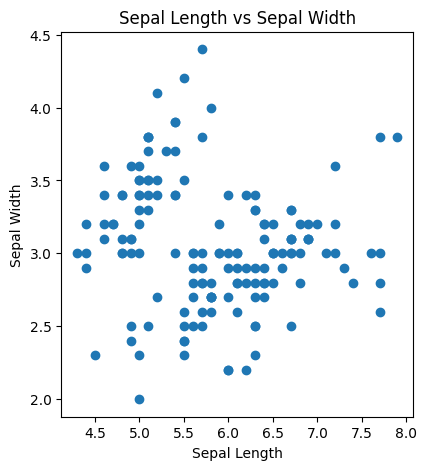

In [ ]:
# Plot Sepal Length vs Sepal Width
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(iris['sepal length (cm)'],
iris['sepal width (cm)'])

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width')

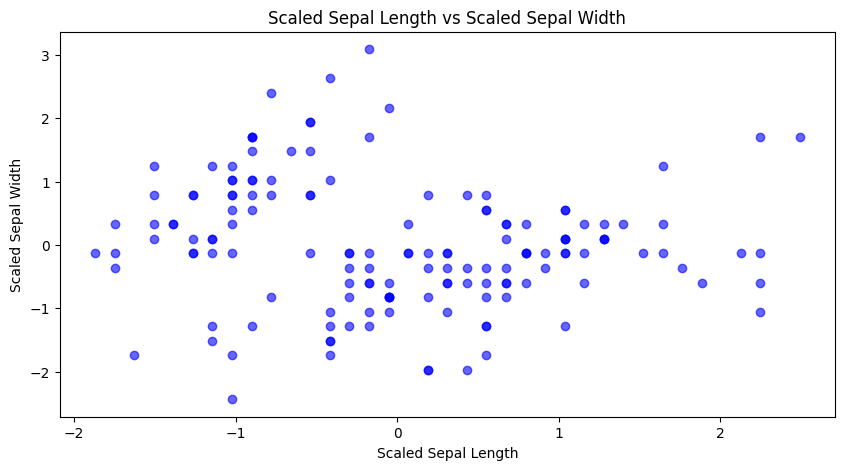

In [ ]:
# Scale Sepal Length and Sepal Width
scaler = StandardScaler()
scaled_data = scaler.fit_transform(iris[['sepal length (cm)', 'sepal width (cm)']])

# Plotting the Scaled Data
plt.figure(figsize=(10, 5))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], color='b', alpha=0.6)
plt.xlabel('Scaled Sepal Length')
plt.ylabel('Scaled Sepal Width')
plt.title('Scaled Sepal Length vs Scaled Sepal Width')
plt.show()

In [ ]:
pca = PCA()
pca_data = pca.fit_transform(
scaler.fit_transform(
iris.iloc[:, :4]))

print("Explained Variance Ratio:",
pca.explained_variance_ratio_)
print("Principal Components:", pca.components_)

Explained Variance Ratio: [0.72962445 0.22850762 0.03668922 0.00517871]
Principal Components: [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]


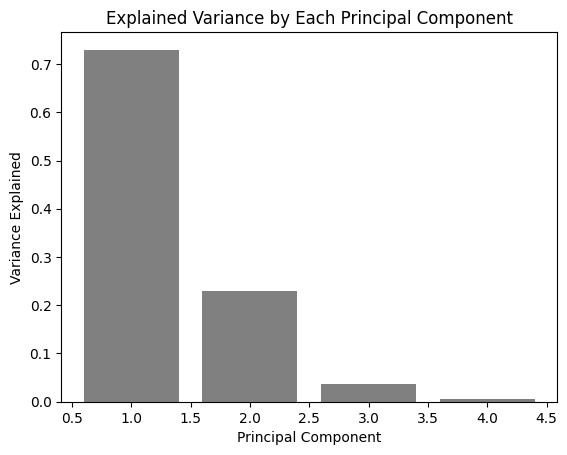

In [ ]:
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1),
pca.explained_variance_ratio_, color='gray')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Explained Variance by Each Principal Component')
plt.show()

In [ ]:
iris[['PC1', 'PC2']] = pca_data[:, :2]

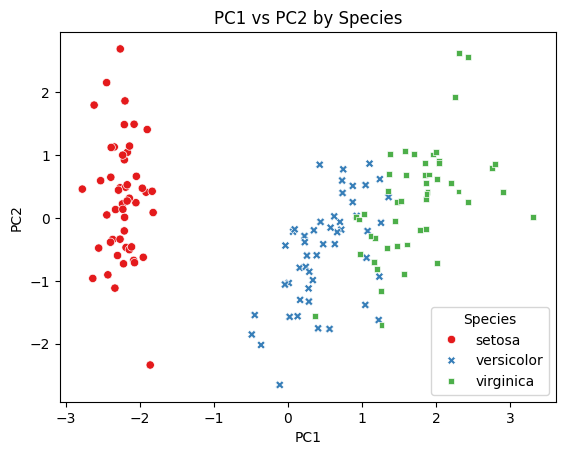

In [ ]:
plt.figure()
sns.scatterplot(data=iris, x='PC1', y='PC2', hue='Species',
style='Species', palette='Set1')
plt.title('PC1 vs PC2 by Species')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
correlation_matrix = np.corrcoef(

scaler.fit_transform(iris.iloc[:, :4]).T,
pca_data[:, :2].T)[:4, 4:]

print("Correlation between original variables and principalcomponents:\n",correlation_matrix)

Correlation between original variables and principalcomponents:
 [[ 0.89016876  0.36082989]
 [-0.46014271  0.88271627]
 [ 0.99155518  0.02341519]
 [ 0.96497896  0.06399985]]
